# Задача:

    Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

    Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

    И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

### Описание датасета:

    1. school — аббревиатура школы, в которой учится ученик
    2. sex — пол ученика ('F' - женский, 'M' - мужской)
    3. age — возраст ученика (от 15 до 22)
    4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
    5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
    6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
    7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
    8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
    9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
    10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
    11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
    12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
    13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
    14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
    15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
    16. schoolsup — дополнительная образовательная поддержка (yes или no)
    17. famsup — семейная образовательная поддержка (yes или no)
    18. paid — дополнительные платные занятия по математике (yes или no)
    19. activities — дополнительные внеучебные занятия (yes или no)
    20. nursery — посещал детский сад (yes или no)
    21. higher — хочет получить высшее образование (yes или no)
    22. internet — наличие интернета дома (yes или no)
    23. romantic — в романтических отношениях (yes или no)
    24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
    25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
    26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
    27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
    28. absences — количество пропущенных занятий
    29. score — баллы по госэкзамену по математике

# Рекомендации по выполнению проекта:

    1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
    2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
    3. Оцените количество уникальных значений для номинативных переменных.
    4. По необходимости преобразуйте данные
    5. Проведите корреляционный анализ количественных переменных
    6. Отберите не коррелирующие переменные.
    7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
    8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import ttest_ind,norm,t

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import fetch_20newsgroups, load_files

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',50) 
pd.set_option('display.max_columns',50) 

# Загружаем данные:

In [16]:
data = pd.read_csv('StudMath.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Рассмотрим названия колонок во избежании дальнейших трудностей при обработке данных:

In [17]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Названия колонок корректны, но для большего удобства сведем все названия к нижнему регистру:

In [18]:
dt = data.copy()
dt.rename(columns={'Pstatus':'p_status','Medu':'m_edu','Fedu':'f_edu',
                  'Mjob':'m_job','Fjob':'f_job','goout':'go_out'}, inplace=True)

Посмотрим на размер массива, и предварительную информацию о нашем датасете.

In [19]:
print(f'Размер датасета: {dt.shape[0]} - строк, {dt.shape[1]} - колонок')

Размер датасета: 395 - строк, 30 - колонок


Посмотрим на количество отсутствующих значений и их процентное соотношение:

In [23]:
def table(df):
    x = pd.DataFrame()
    x['Всего NaN'] = df.isna().sum()
    x['% NaN'] = round((x['Всего NaN'] / df.shape[0])*100, 2)
    x = x[x['% NaN'] != 0].sort_values('% NaN', ascending=False)
    return x


table(data)

,Всего NaN,% NaN
Pstatus,45,11.39
paid,40,10.13
famsup,39,9.87
Fjob,36,9.11
internet,34,8.61
romantic,31,7.85
guardian,31,7.85
traveltime,28,7.09
famrel,27,6.84
famsize,27,6.84


Проще сказать где нет Nan ))) 

Обратим внимание, что в описании 29 строк, а по факту 30. В описании отсутствует информация о 'studytime, granular'. Возможно этот столбец имеет связь со столбцом 'studytime'. 

In [24]:
dt.loc[:,['studytime','studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


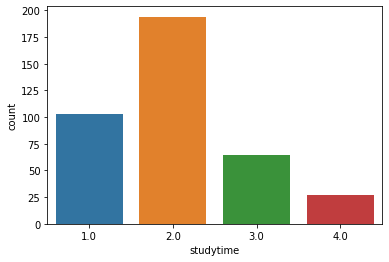

In [33]:
sns.countplot(x=dt['studytime'], data=dt)

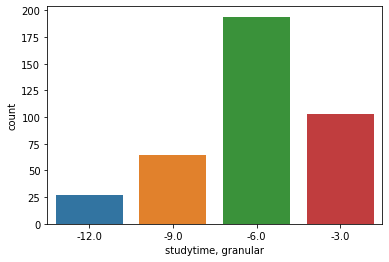

In [30]:
sns.countplot(x=dt['studytime, granular'], data=dt)

Вывод: у столбцов очевидная прямая отрицательная корреляция. Какая информация содержится в 'studytime, granular' остается неизвестным. Скорее всего произошла ошибка и эти данные можно удалить, эти данные не отображены в техническом описании.

In [34]:
# Удаление признака studytime, granular из датафрейма
dt = dt.drop(['studytime, granular'], axis=1)

   Прежде чем приступить к непосредственному анализу данных их очистки и приведению к удобному для дальнейшей обработки виду, их следует разделить. Признаки в датасете можно разделить на две категории: количественные(числовые) и номинативные(категориальные). Для каждой категории у нас будут определенные методы анализа и восстановления данных.

In [38]:
categorical_col = [
    col for col in dt.columns if dt[col].dtype.name == 'object']
numerical_col = [
    col for col in dt.columns if dt[col].dtype.name != 'object']

print(f'Количество категориальных признаков: {len(categorical_col)}')
print(categorical_col)
print(60*'==')
print(f'Количество числовых признаков: {len(numerical_col)}')
print(numerical_col)

Количество категориальных признаков: 17
['school', 'sex', 'address', 'famsize', 'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Количество числовых признаков: 12
['age', 'm_edu', 'f_edu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'go_out', 'health', 'absences', 'score']


## Функции обработки датасета:

Для ускорения процессов анализа данных напишем несколько функций:
    1. ColumnInfo() - эта функция будет выдавать информацию о количестве уникальных значений указанного признака и его распределении, также она показывает количество пропущенных значений и строит график распределения величины текущей (неизмененной) выборки признака;
    2. ColumnApdateInfo() - строит график распределения величины текущей выборки признака после введеных изменнений;
    3. FillNan() - заполняет отсутствующие значения колонки признака ее средним значением.

In [48]:
def ColumnInfo(col):
    print(f'Список уникальных значений колонки: {col.unique()}')
    print(60*'==')
    print(f'Распределение данных: {col.describe()}')
    print(60*'==')
    print(f'Количество пропущенных ячеек: {dt.shape[0]-col.count()}')
    plt.figure(figsize=(15, 7))
    return sns.countplot(x=col, data=dt)


def ColumnApdateInfo(x):
    print(f'Количество пропущенных ячеек: {dt.shape[0]-x.count()}')
    plt.figure(figsize=(15, 7))
    return sns.countplot(x=x, data=dt)


def FillNan(coll):
    column_means = round(coll.mean(), 0)
    coll = coll.fillna(column_means, inplace=True)
    return coll

## Рассмотрим количественные признаки:

In [49]:
dt[numerical_col].describe()

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,go_out,health,absences,score
count,395.000000,395.000000,371.000000,367.000000,388.000000,373.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.751899,2.614555,1.438692,2.038660,0.337802,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.094154,2.228732,0.694181,0.842078,0.743135,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Из таблицы полученных значении видно, что только в столбце 'age' нет пропущенных значений. В столбцах 'Fedu', 'absences' и 'famrel' похоже есть выбросы, изучим каждую колонку более подробно:

### Колонка Age (возраст ученика):

Список уникальных значений колонки: [18 17 15 16 19 22 20 21]
Распределение данных: count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Количество пропущенных ячеек: 0


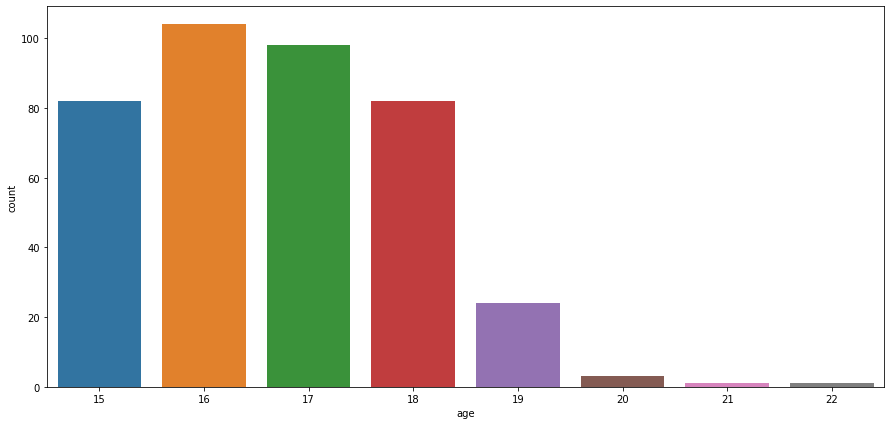

In [50]:
ColumnInfo(data.age)

В колонке Age нет пропущенных значений и аномальных выбросов значений. Вопросы могли бы вызвать значения возрастной группы от 18 лет, но в самом задании сказано: отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет. Все значения попадают в заданный интервал.

### Колонка m_edu:
Образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Список уникальных значений колонки: [4. 1. 3. 2. 0.]
Распределение данных: count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64
Количество пропущенных ячеек: 0


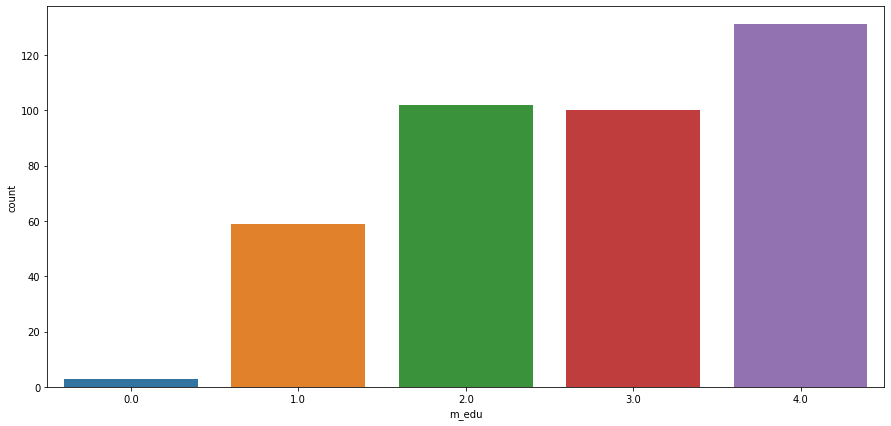

In [51]:
ColumnInfo(dt.m_edu)

Заполнить пропущенные значения можно с помощью метода fillna. Заполним, например, медианными значениями и и округлим до целого числа.

Количество пропущенных ячеек: 0


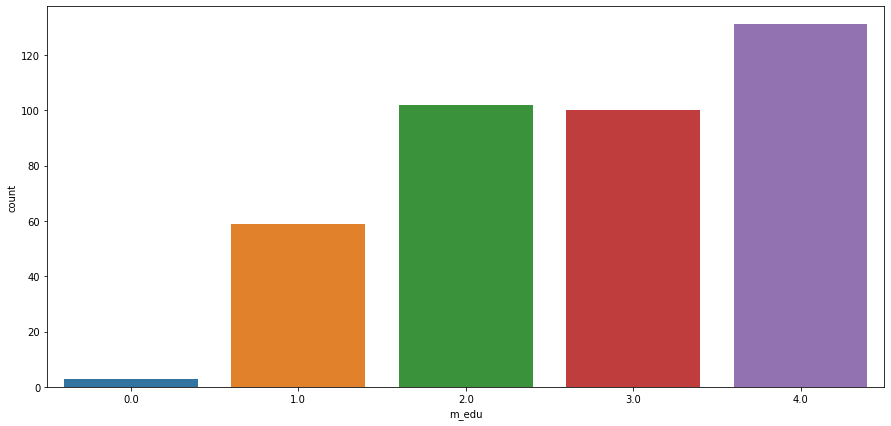

In [52]:
FillNan(dt.m_edu)
ColumnApdateInfo(dt.m_edu)

В колонке m_edu устранены пропущенные значения, аномальных выбросов значений нет. Исходя из полученного графика большинство матерей имеют среднее или среднее-специальное образование. 

### Колонка f_edu:
Образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Список уникальных значений колонки: [ 4.  1.  2.  3. 40. nan  0.]
Распределение данных: count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: f_edu, dtype: float64
Количество пропущенных ячеек: 24


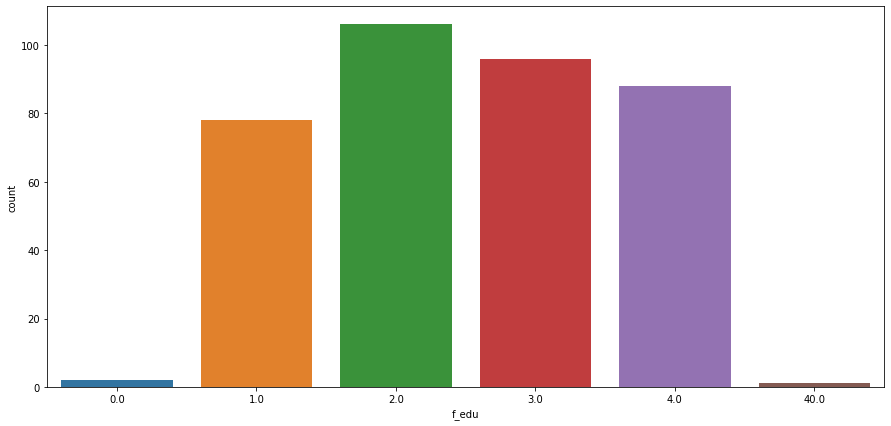

In [53]:
ColumnInfo(dt.f_edu)

Имеется выброс равный 40 скорее всего произошла опечатка и возможное значение это 4. Заменим это значение.

In [54]:
dt.f_edu = dt.f_edu.apply(lambda x: 4 if x == 40 else x)

Заполним пропущенные значения:

Количество пропущенных ячеек: 0


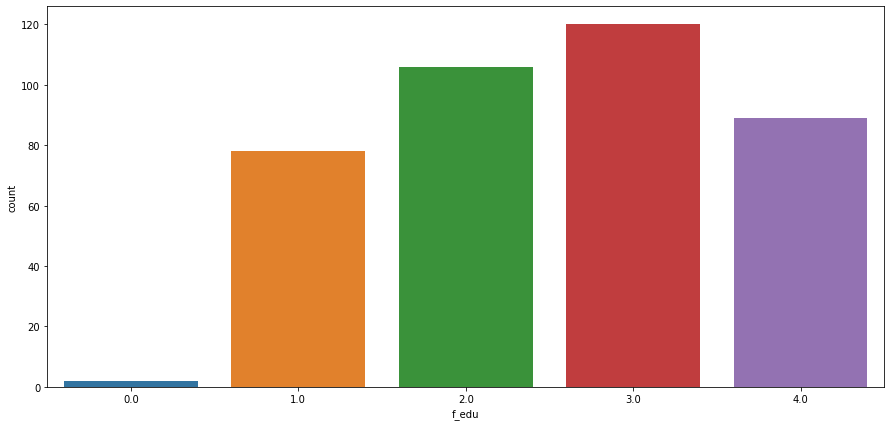

In [55]:
FillNan(dt.f_edu)
ColumnApdateInfo(dt.f_edu)

В колонке f_edu устранены пропущенные значения и аномальные выбросы. Исходя из полученного графика большинство отцов имеют среднее или среднее-специальное образование. 

### Колонка traveltime:
Время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Список уникальных значений колонки: [ 2.  1.  3. nan  4.]
Распределение данных: count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
Количество пропущенных ячеек: 28


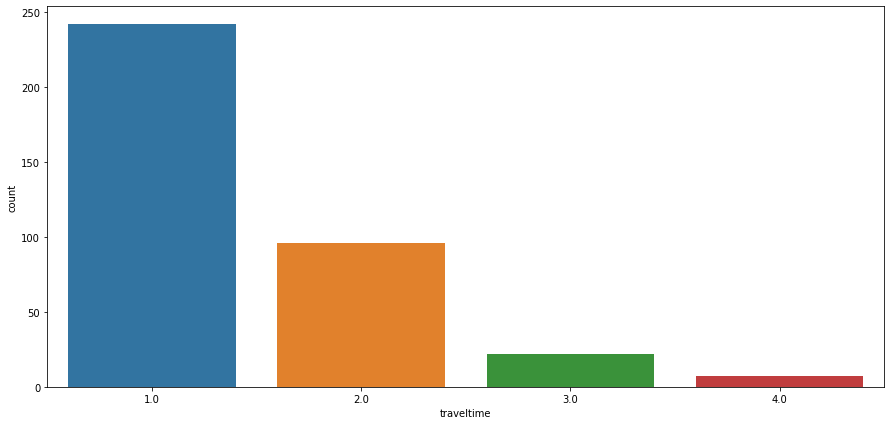

In [56]:
ColumnInfo(dt.traveltime)

Заполним пропущенные значения:

Количество пропущенных ячеек: 0


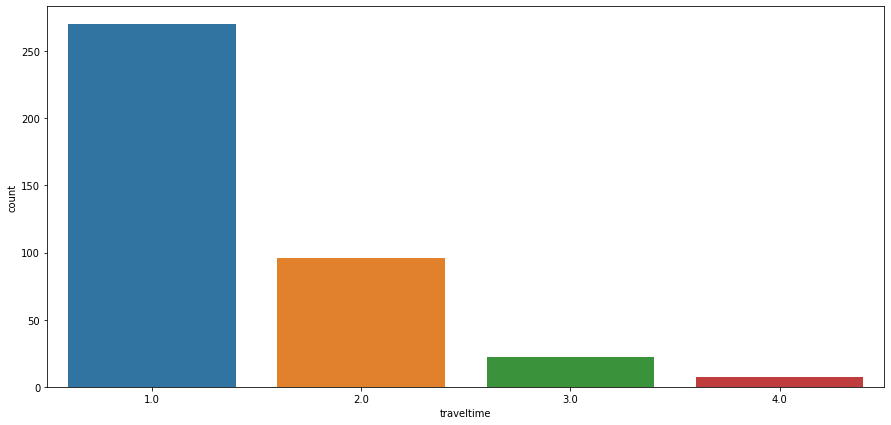

In [57]:
FillNan(dt.traveltime)
ColumnApdateInfo(dt.traveltime)

У большинства учащихся время до школы занимает не более 15 мин.

### Колонка studytime:
Время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

Список уникальных значений колонки: [ 2.  3.  1. nan  4.]
Распределение данных: count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
Количество пропущенных ячеек: 7


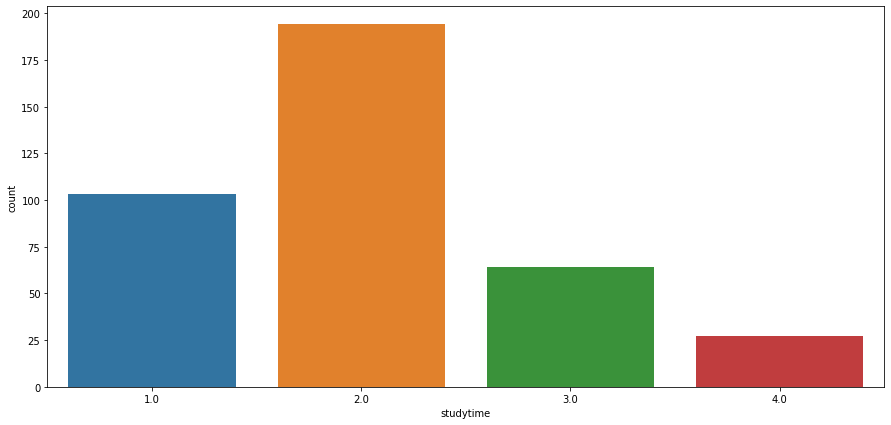

In [58]:
ColumnInfo(dt.studytime)

Заполним пропущенные значения:

Количество пропущенных ячеек: 0


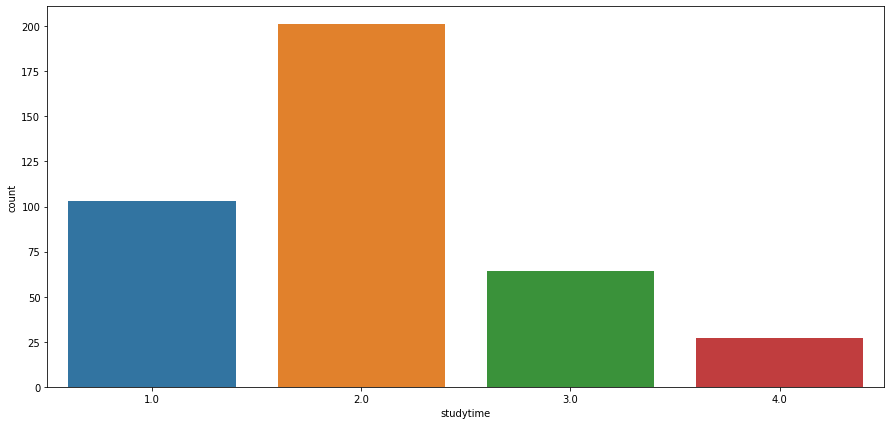

In [59]:
FillNan(dt.studytime)
ColumnApdateInfo(dt.studytime)

### Колонка failures:
Количество внеучебных неудач (n, если 1<=n<3, иначе 0)

Список уникальных значений колонки: [ 0.  3. nan  2.  1.]
Распределение данных: count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
Количество пропущенных ячеек: 22


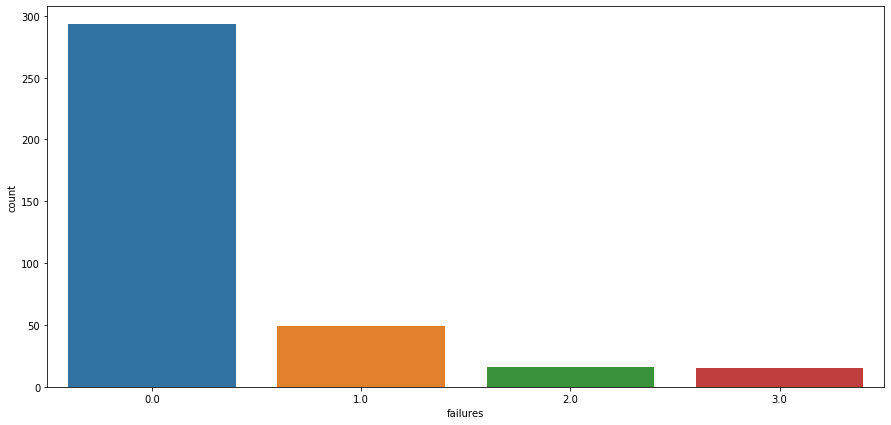

In [256]:
ColumnInfo(dt.failures)

Заполним пропущенные значения:

Количество пропущенных ячеек: 0


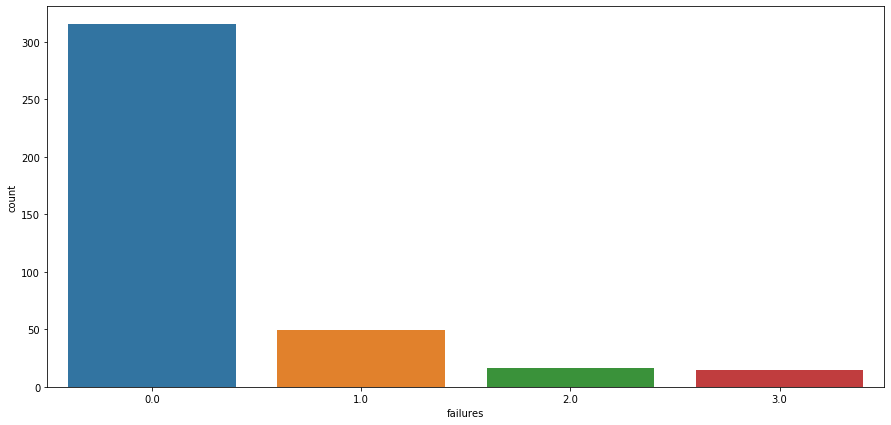

In [60]:
FillNan(dt.failures)
ColumnApdateInfo(dt.failures)

### Колонка famrel:
Cемейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Список уникальных значений колонки: [ 4.  5.  3. nan -1.  2.  1.]
Распределение данных: count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
Количество пропущенных ячеек: 27


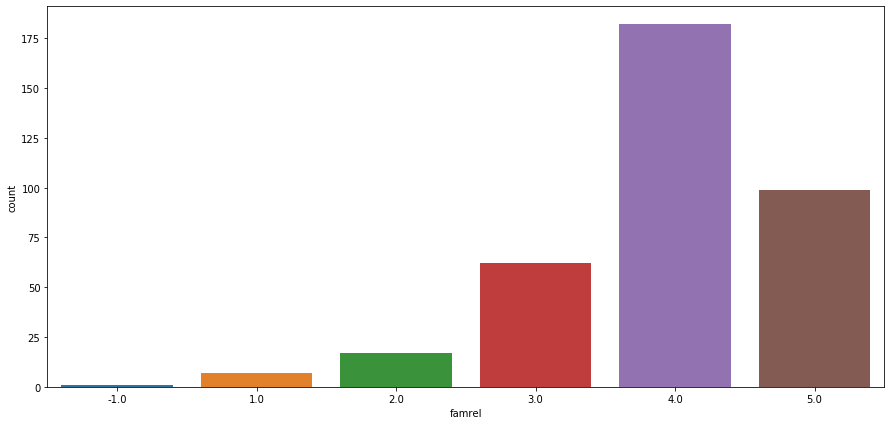

In [61]:
ColumnInfo(dt.famrel)

In [64]:
dt.famrel = dt.famrel.apply(lambda x: 1 if x == -1 else x)

Заполним пропущенные значения:

Количество пропущенных ячеек: 0


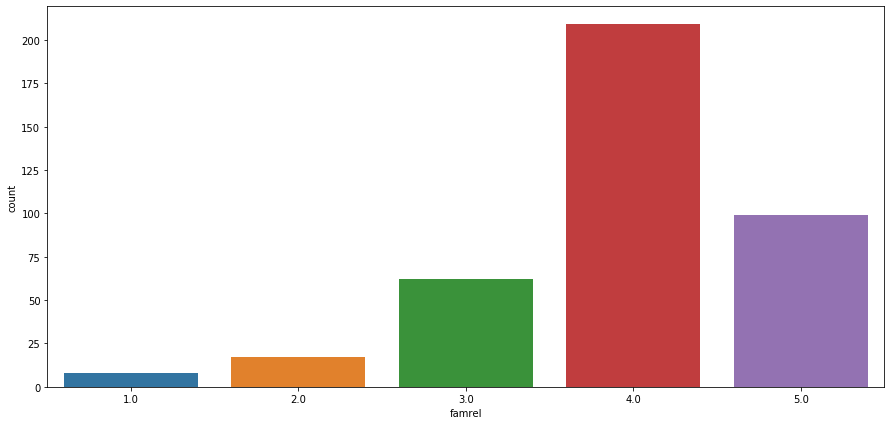

In [65]:
FillNan(dt.famrel)
ColumnApdateInfo(dt.famrel)

### Колонка freetime:
Cвободное время после школы (от 1 - очень мало до 5 - очень мого)

Список уникальных значений колонки: [ 3.  2.  4.  1.  5. nan]
Распределение данных: count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
Количество пропущенных ячеек: 11


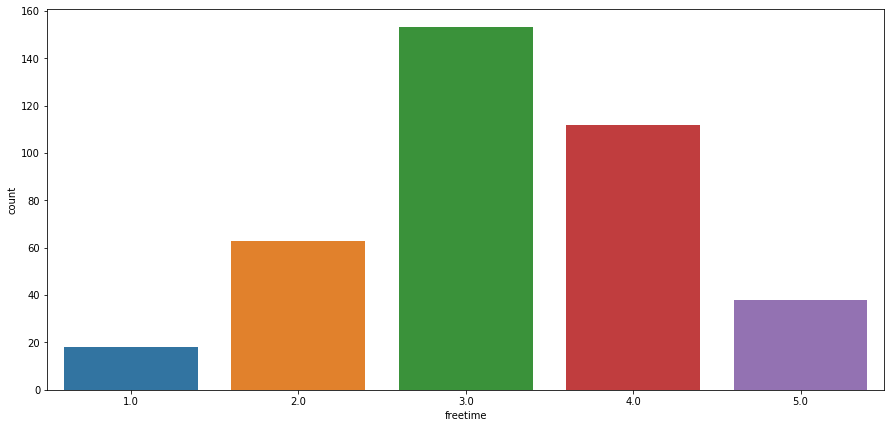

In [66]:
ColumnInfo(dt.freetime)

Заполним пропущенные значения:

Количество пропущенных ячеек: 0


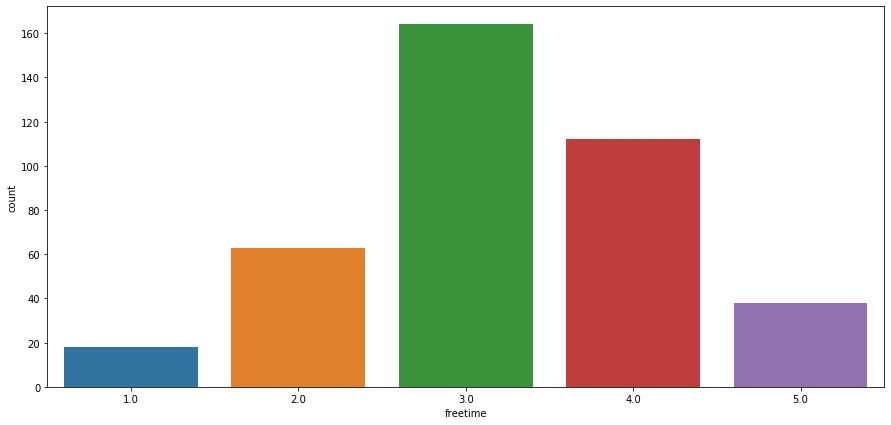

In [67]:
FillNan(dt.freetime)
ColumnApdateInfo(dt.freetime)

### Колонка goout:
Проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Список уникальных значений колонки: [ 4.  3.  2.  1.  5. nan]
Распределение данных: count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64
Количество пропущенных ячеек: 8


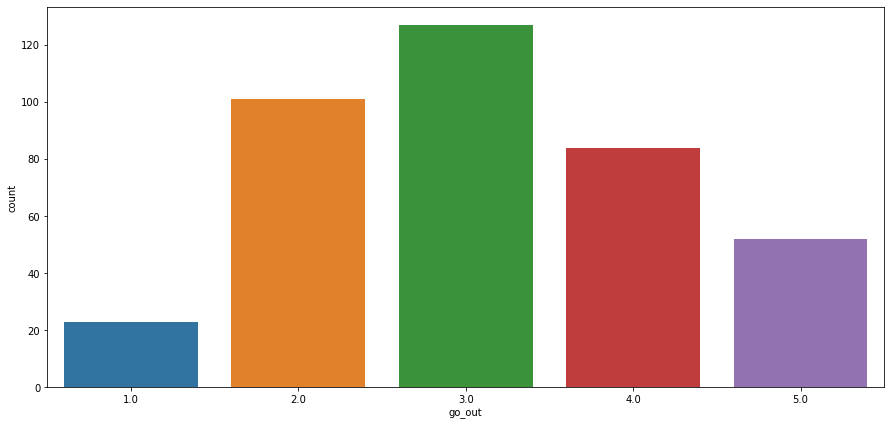

In [69]:
ColumnInfo(dt.go_out)

Заполним пропущенные значения:

Количество пропущенных ячеек: 0


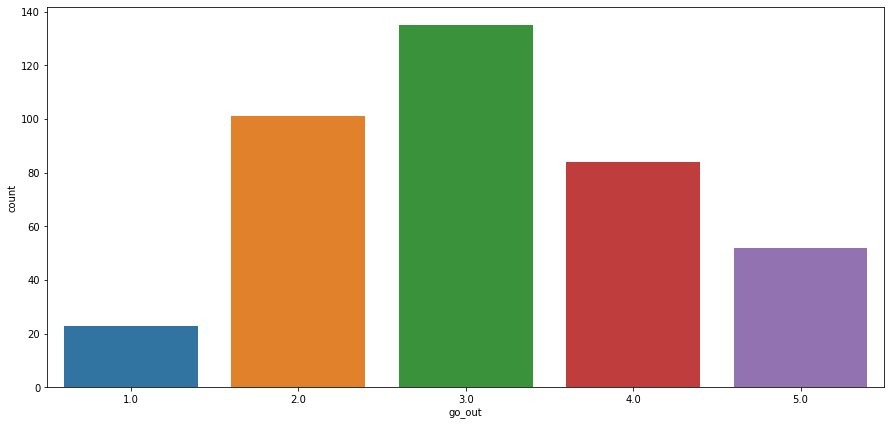

In [70]:
FillNan(dt.go_out)
ColumnApdateInfo(dt.go_out)

### Колонка health:
Текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

Список уникальных значений колонки: [ 3.  5.  1.  2.  4. nan]
Распределение данных: count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
Количество пропущенных ячеек: 15


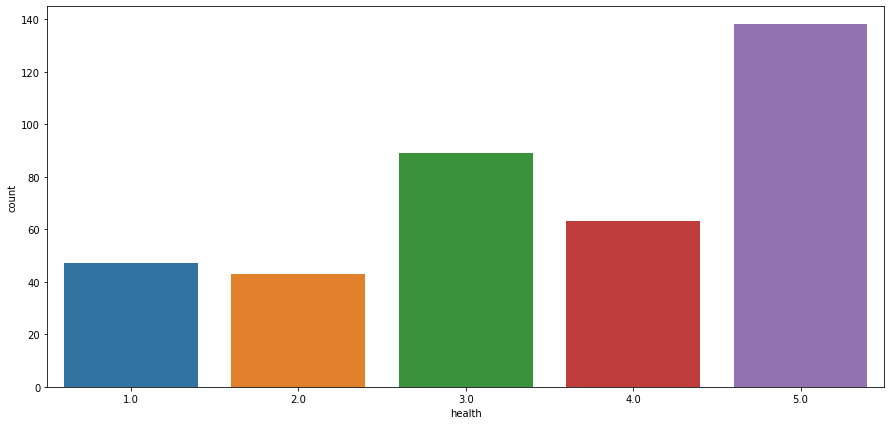

In [71]:
ColumnInfo(dt.health)

Заполним пропущенные значения:

Количество пропущенных ячеек: 0


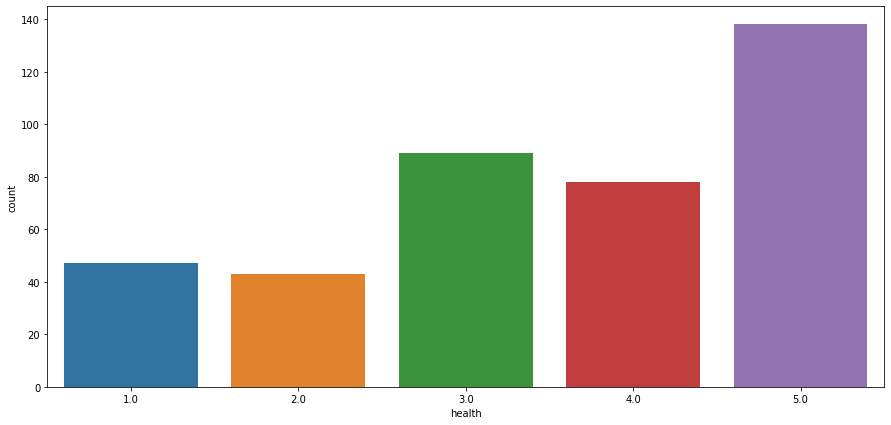

In [72]:
FillNan(dt.health)
ColumnApdateInfo(dt.health)

### Колонка absences:
Количество пропущенных занятий

Список уникальных значений колонки: [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]
Распределение данных: count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
Количество пропущенных ячеек: 12


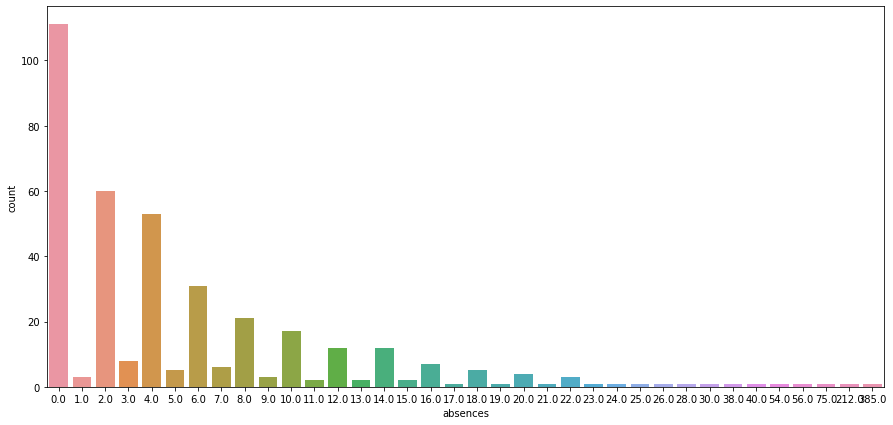

In [73]:
ColumnInfo(dt.absences)

Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

percentile(25) -1.5*IQR : percentile(75)+1.5*IQR

IQR = percentile(75) - percentile(25).

In [74]:
percintile_25 = 0
percintile_75 = 8
IQR = percintile_75 - percintile_25

Min = percintile_25 - 1.5*IQR
Max = percintile_75 + 1.5*IQR

if Min <= 0: Min = 0

print(f'Границы выбросов - {Min} : {Max}')

Границы выбросов - 0 : 20.0


In [75]:
dt.absences = dt.absences.apply(lambda x: None if x >= 20 else x)

Заполним пропущенные значения:

Количество пропущенных ячеек: 0


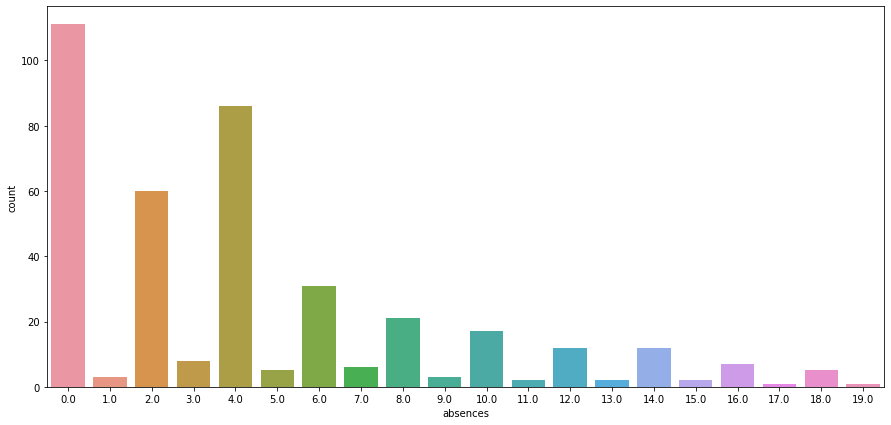

In [76]:
FillNan(dt.absences)
ColumnApdateInfo(dt.absences)

### Колонка score:
Баллы по госэкзамену по математике

Список уникальных значений колонки: [ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]
Распределение данных: count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
Количество пропущенных ячеек: 6


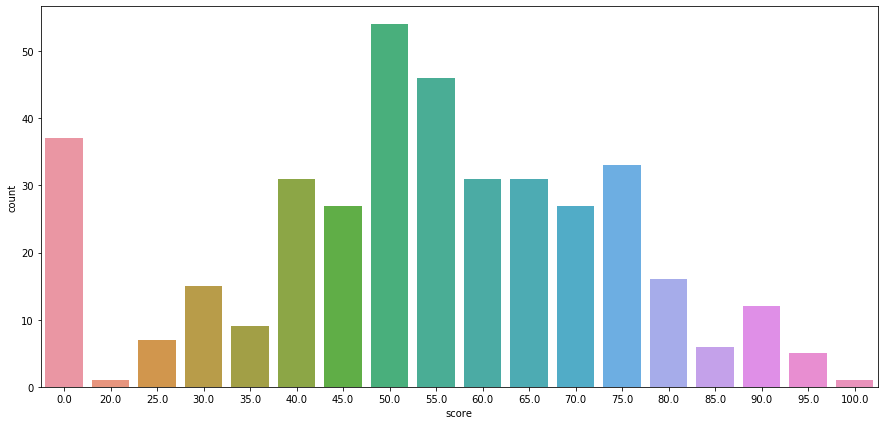

In [77]:
ColumnInfo(dt.score)

Заполним пропущенные значения:

In [78]:
FillNan(dt.score)

In [80]:
dt[numerical_col].describe()

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,go_out,health,absences,score
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.751899,2.546835,1.407595,2.037975,0.318987,3.946835,3.225316,3.103797,3.549367,4.397468,52.258228
std,1.276043,1.094154,1.061418,0.678490,0.834580,0.726244,0.872425,0.980711,1.104610,1.372118,4.519163,22.743865
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.500000,4.000000,4.000000,5.000000,6.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,19.000000,100.000000


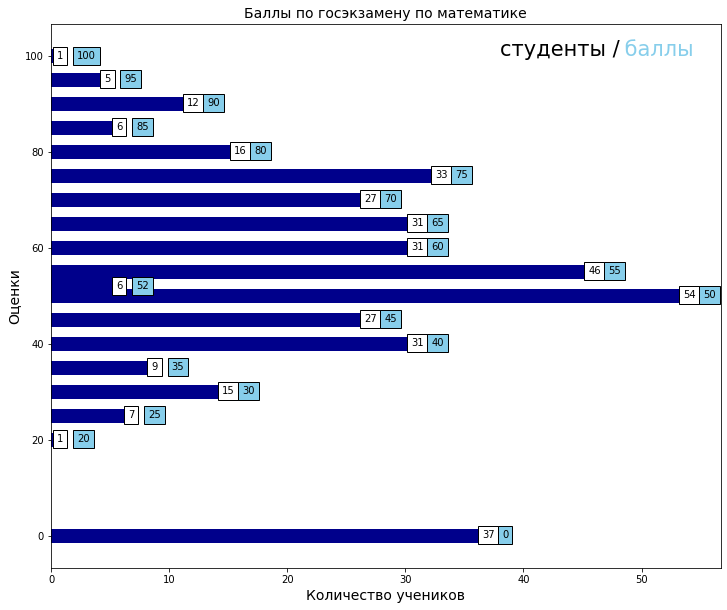

In [82]:
# Создание фигуры
fig, ax = plt.subplots(figsize=(12,10))


# Создание графикa
score_bar = ax.barh(dt['score'].value_counts().index,dt['score'].value_counts(),height=3,color='darkblue');


# Настройка параметров
#ax.set_facecolor('black')
ax.set_xlabel('Количество учеников',fontsize=14);
ax.set_ylabel('Оценки',fontsize=14);
labels = ['студенты','оценки']
ax.text(38,100,'студенты /',color='black',size=21)
ax.text(48,100,' баллы',color='skyblue',size=21)
ax.set_title('Баллы по госэкзамену по математике',size=14)


# Вывод значений
for elem in score_bar:
    plt.text(elem.get_x() + elem.get_width()-0.5,elem.get_y()+elem.get_height()-2,elem.get_width(),
            fontsize=10,bbox=dict(facecolor='white'))
for elem in score_bar:
    plt.text(elem.get_x() + elem.get_width()+1.2,elem.get_y()+elem.get_height()-2,int(elem.get_y()+1.5),
            fontsize=10,bbox=dict(facecolor='skyblue'))
    

### Корреляционный анализ:

Выясним, какие столбцы коррелируют с результатом на успеваемость по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляцию рассмотрим только для числовых столбцов:

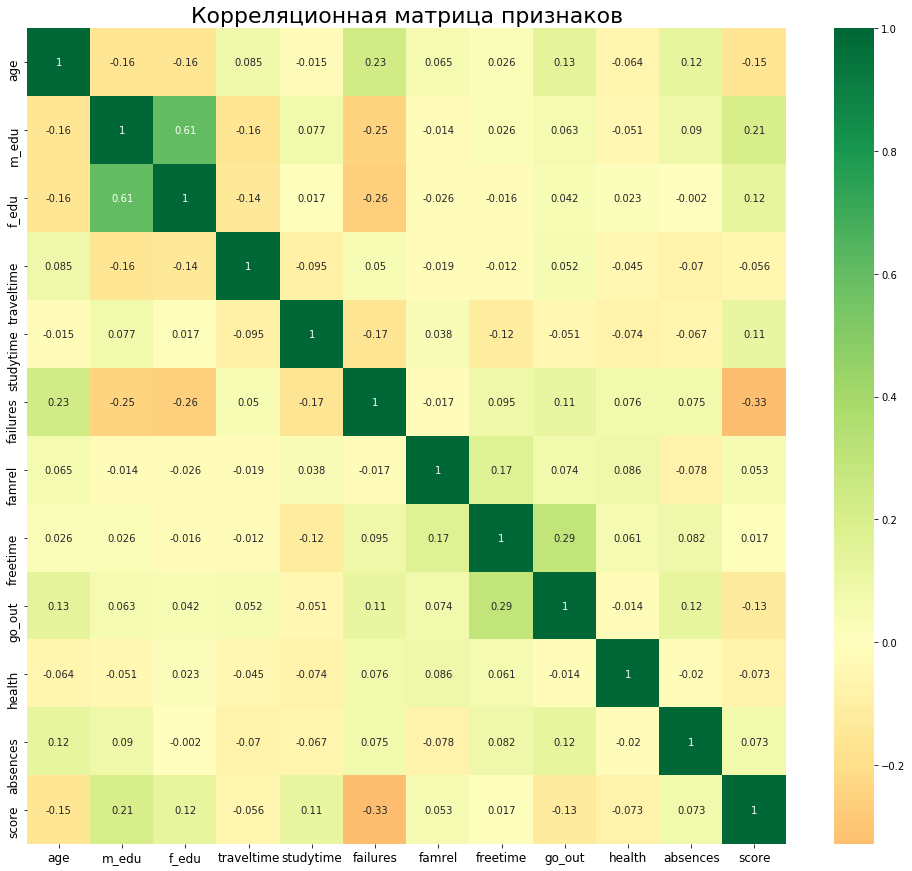

In [83]:
plt.figure(figsize=(17,15))
sns.heatmap(dt.corr(), xticklabels=dt.corr().columns,
            yticklabels=dt.corr().columns, 
            cmap='RdYlGn', center=0, annot=True)


plt.title('Корреляционная матрица признаков', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [85]:
dt.corr()[:-1]['score']

age          -0.153481
m_edu         0.207583
f_edu         0.123559
traveltime   -0.056016
studytime     0.114074
failures     -0.328451
famrel        0.052626
freetime      0.017298
go_out       -0.127048
health       -0.072955
absences      0.073030
Name: score, dtype: float64

### Промежуточный вывод:
Все значения кроме 'failures' имеют очень слабую корреляцию менее 0.2. Вполне логично что с уменьшением 'failures' значение 'score' будет увеличиваться. 
Интересно обратить внимание на то что значения Medu и Fedu достаточно сильно коррелируют между собой, но при этом коэффициет корреляции Medu и score равен 0.21, а коэффициет корреляции Fedu и score равен 0.11. Можно предположить что семейные пары формируются в том числе исходя из уроня их образования, а возможно большинство пар просто знакомятся в момент учебы в колледже, университете итд. В любом слючае стоит заметить что уровень образования родителей имеет влияние на вероятность успешно сдать тест. Это еще раз доказывает отрицательная корреляция Medu и Fedu по отношению к 'failures', видимо родители помогают детям делать уроки или хотя бы дают дельные советы).

Проверим, есть ли статистическая разница в распределении оценок по числовым признакам с помощью теста Стьюдента. 
Проверим нулевую гипотезу о том, что распределения оценок результирующего теста по различным параметрам неразличимы:

Учтем полученные результаты и составим финальный датасет для числовых признаков:

In [87]:
numerical_for_new_date = dt[['age', 'm_edu',
                               'studytime', 'failures', 'go_out']]

## Рассмотрим номинативные колонки:

In [89]:
dt[categorical_col].describe()

,school,sex,address,famsize,p_status,m_job,f_job,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


И в этом наборе данных проще перечислить признаки где отсутствуют пропущенные значения: school, sex. Заполним отсутствующие ячейки наиболее часто встречающимися значениями в признаках:

In [92]:
data_describe = dt.describe(include=[object])

for col in categorical_col:
    dt[col] = dt[col].fillna(data_describe[col]['top'])

In [93]:
data.describe(include=[object])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,312,288,314,133,197,137,250,335,219,200,195,300,356,305,240


Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения score в зависимости от значения этих переменных. Это можно сделать с помощью box-plot (график показывает плотность распределения переменных).

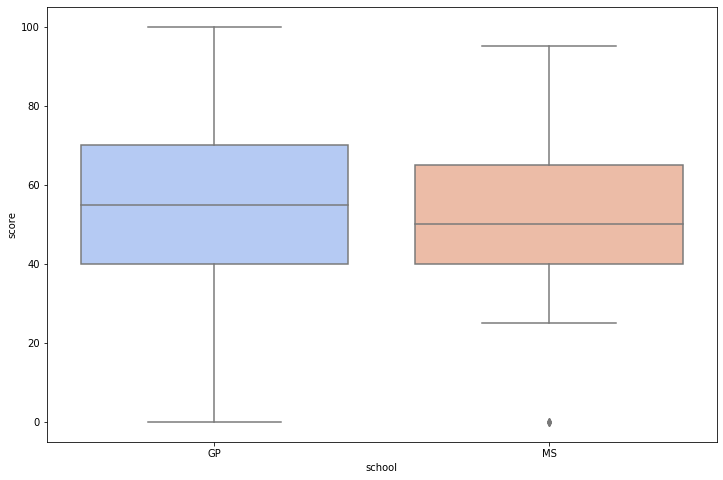

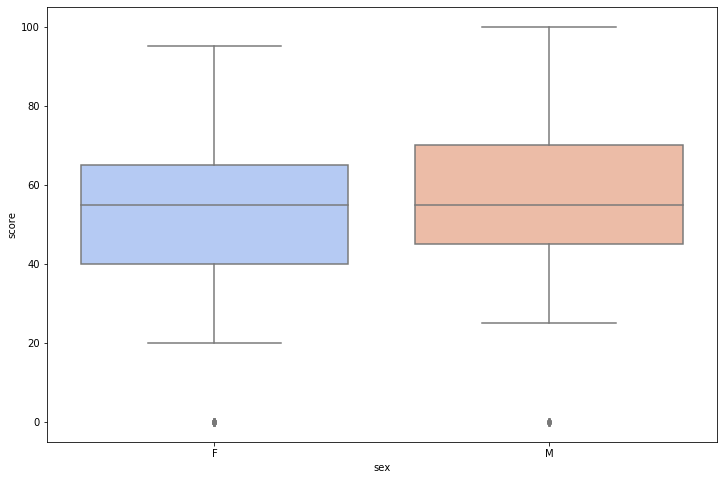

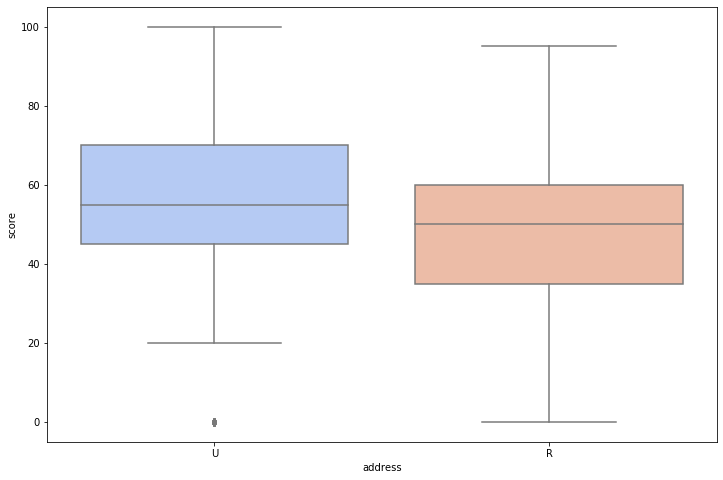

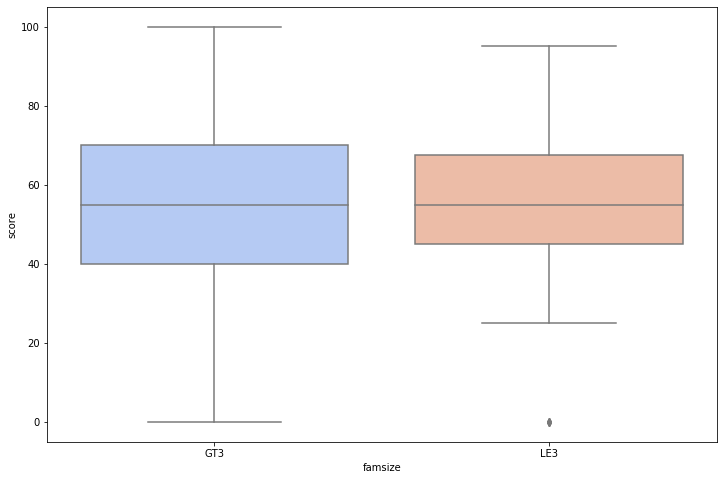

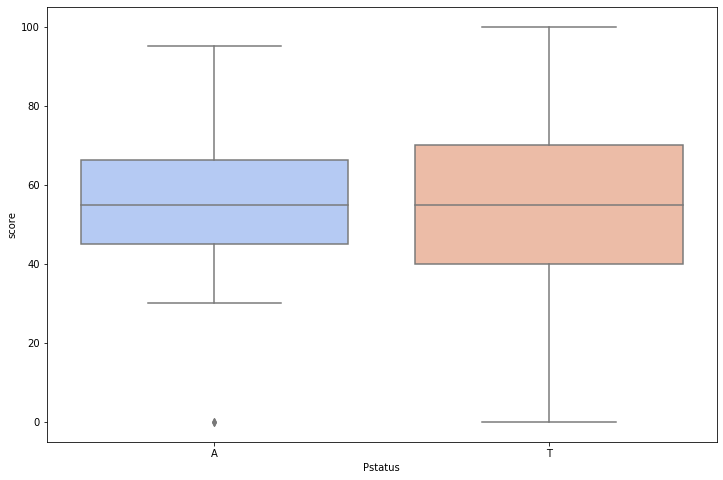

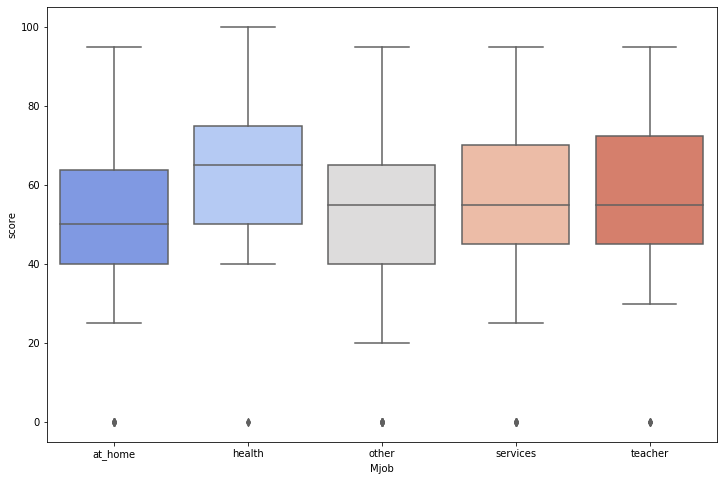

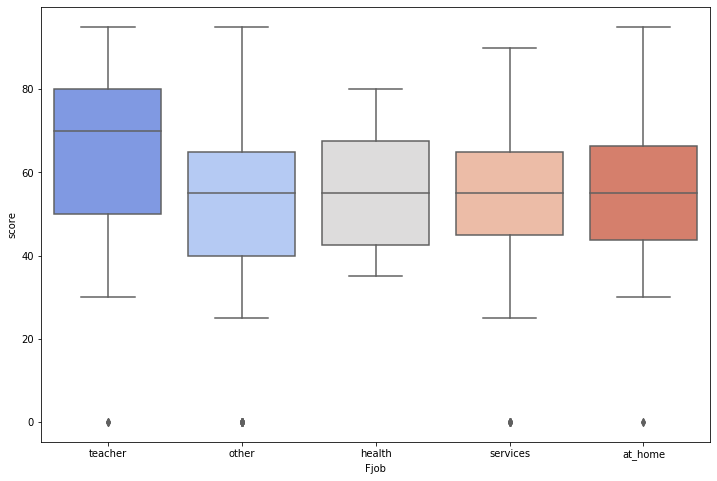

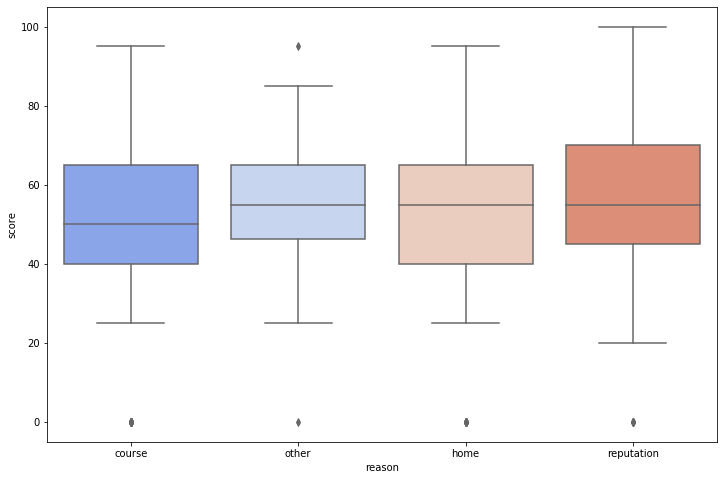

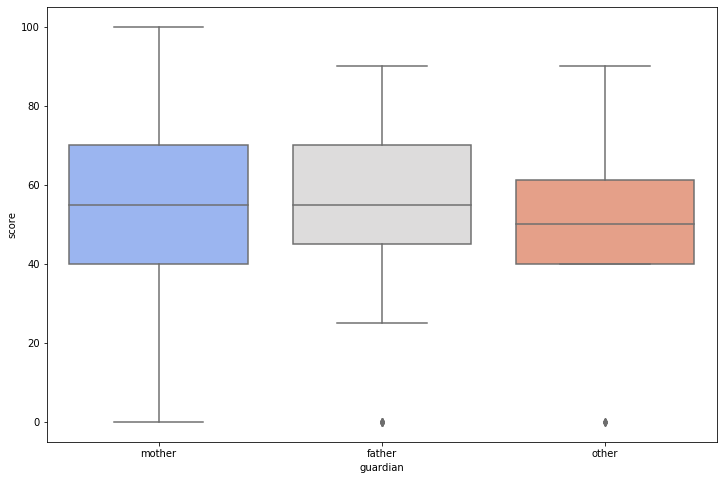

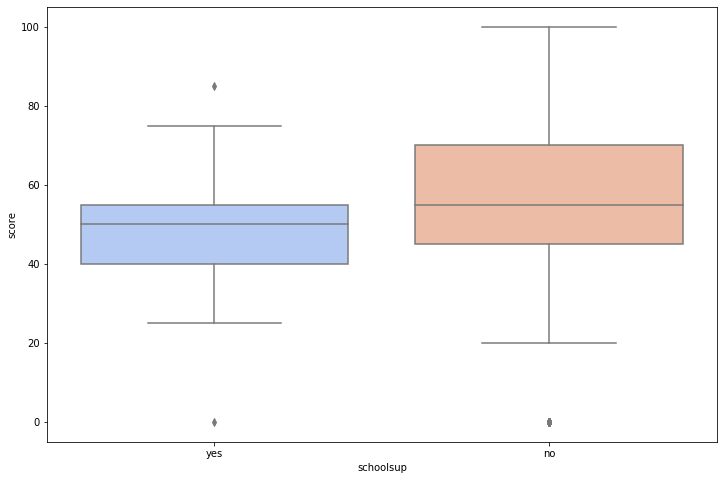

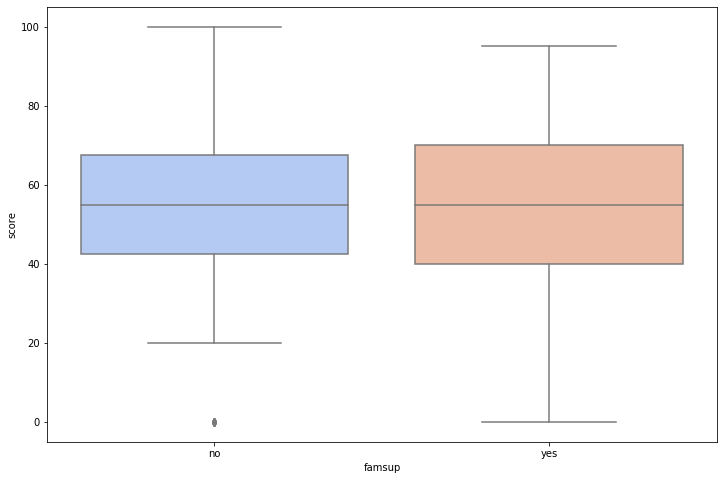

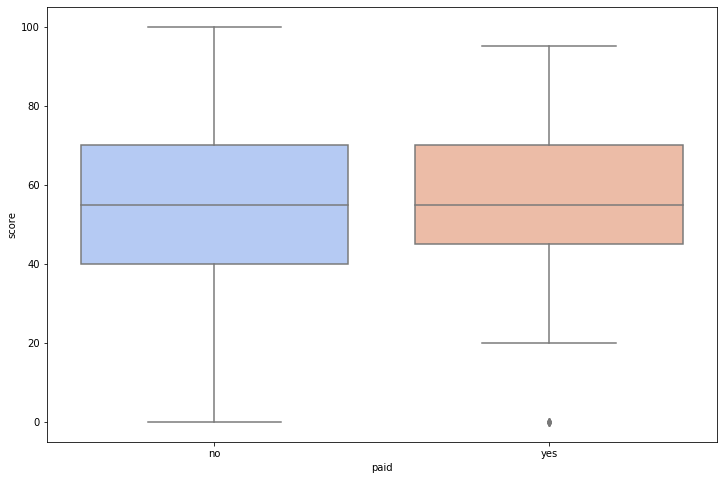

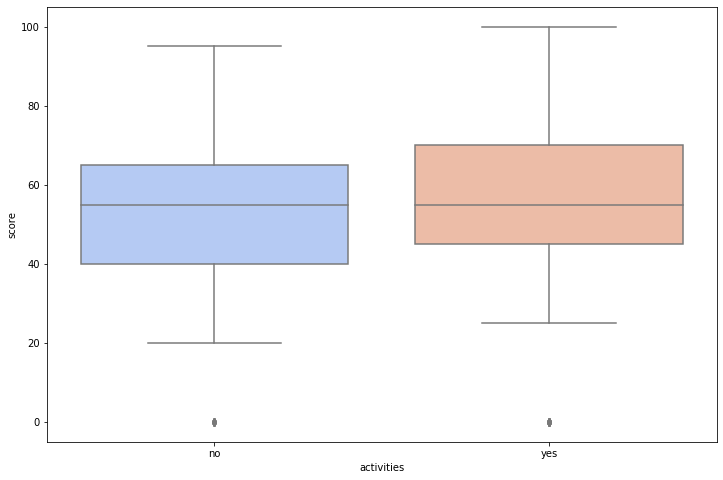

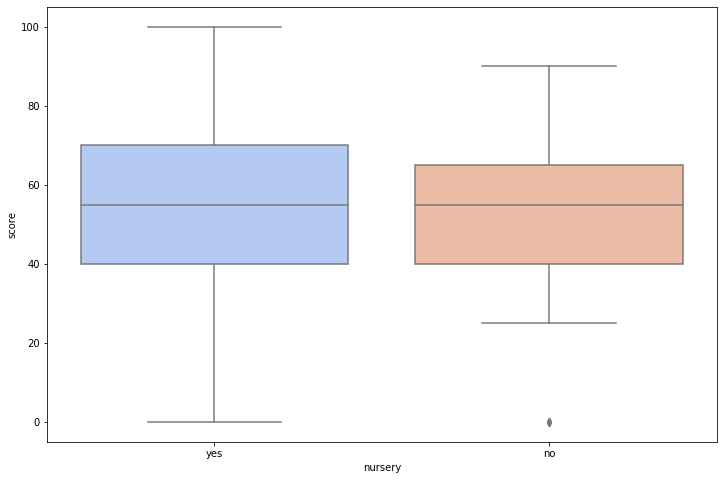

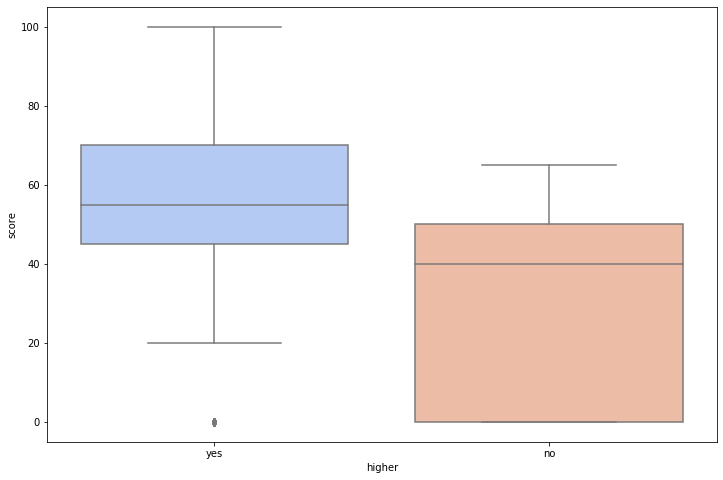

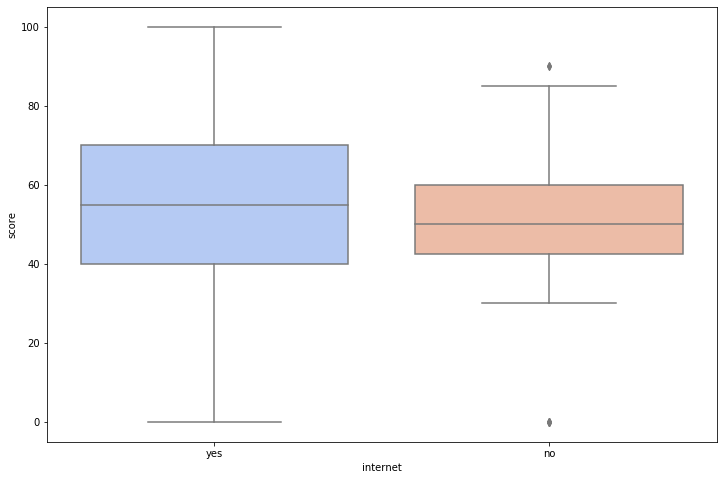

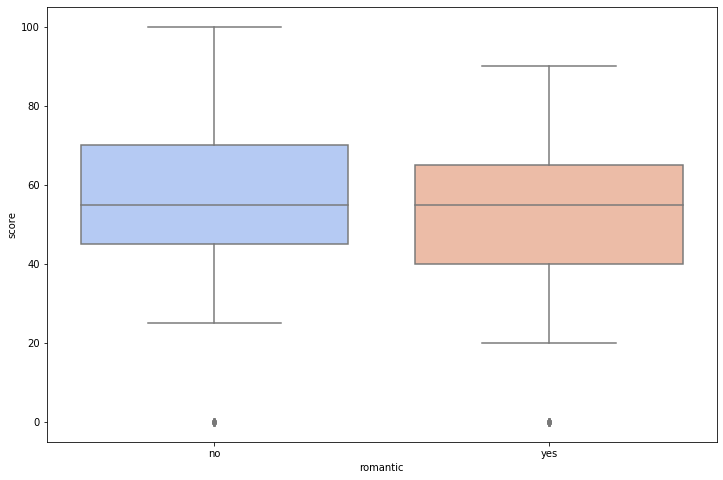

In [94]:
def BoxPlot(col):
    if data[col].dtype.name == 'object':
        plt.figure(figsize=(12,8))
        sns.boxplot(
        x=col, y="score", data=data, palette="coolwarm");        
    else:
        pass
    return


for col in data:
    BoxPlot(col)

По графикам похоже, что все параметры, кроме activites, paid, reason могут влиять на результирующие оценки теста. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. 
Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 
Проверим нулевую гипотезу о том, что распределения оценок результирующего теста по различным параметрам неразличимы:

In [98]:
def get_stat_dif(column):
    cols = dt.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(dt.loc[dt.loc[:, column] == comb[0], 'score'],
                     dt.loc[dt.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [111]:
for col in dt[categorical_col]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются четыре параметра: address,  Mjob, higher  и  romantic. Оставим эти переменные в датасете для дальнейшего построения модели.

In [113]:
nominative_for_new_date = dt[['address', 'm_job', 'higher', 'romantic']]
nominative_for_new_date.describe()

,address,m_job,higher,romantic
count,395,395,395,395
unique,2,5,2,2
top,U,other,yes,no
freq,312,152,376,271


### Сформируем итоговый датасет:

In [114]:
Total_data = pd.concat(
    (numerical_for_new_date, nominative_for_new_date), axis=1)
Total_data

,age,m_edu,studytime,failures,go_out,address,m_job,higher,romantic
0,18,4.0,2.0,0.0,4.0,U,at_home,yes,no
1,17,1.0,2.0,0.0,3.0,U,at_home,yes,no
2,15,1.0,2.0,3.0,2.0,U,at_home,yes,no
3,15,4.0,3.0,0.0,2.0,U,health,yes,yes
4,16,3.0,2.0,0.0,2.0,U,other,yes,no
...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,2.0,4.0,U,services,yes,no
391,17,3.0,1.0,0.0,5.0,U,services,yes,no
392,21,1.0,1.0,3.0,3.0,R,other,yes,no
393,18,3.0,1.0,0.0,1.0,R,services,yes,no


## Вывод:

Итак, в результате EDA для анализа условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

В данных было достаточно пустых значений, выбросы найдены только в столбцах (Fedu - образование отца) и (famrel - отношения в семье), также выбросы устранены в столбце пропущенных занятий.
Пропущенные значения заполнялись средними значениями вычисленные для каждого числового столбца и наиболее часто встречающимися значениями для номинативных значениях.

Корреляционный анализ предоставил следующие закономерности:
1. Все значения кроме 'failures' имеют очень слабую корреляцию менее 0.2;
2. Значения Medu и Fedu достаточно сильно коррелируют между собой;
3. Отрицательная корреляция Medu и Fedu по отношению к 'failures';
4. "Нелогичная" (на мой взгляд) корреляция 'absences'- прогулов к результату теста score. Всего 0.07 и она положительна!
5. Достаточно высокая (в сравнении с другими признаками) корреляция 'age' и 'score'. Чем младше ученики тем лучше их результаты.

В итоге были оставлены признаки со значениями корреляции выше 0.1.

Для номинативных данных была расчитана статистическая разница в распределении оценок по числовым признакам с помощью теста Стьюдента. Проверили нулевую гипотезу о том, что распределения оценок результирующего теста по различным параметрам неразличимы,  в результате получили 4 столбца, где статистически значимые различия были найдены. Столбцы ['address', 'Mjob', 'higher', 'romantic'].

Эти операции позволили нам очистить и привести данные к дальнейшему анализу.

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

# Машинное обучение:

## Векторизация:

Библиотека scikit-learn не умеет напрямую обрабатывать категориальные признаки. Поэтому прежде чем подавать данные на вход алгоритмов машинного обучения преобразуем категориальные признаки в количественные.

Категориальные признаки, принимающие два значения (т.е. бинарные признаки) и принимающие большее количество значений будем обрабатывать по-разному.

In [115]:
data_describe = nominative_for_new_date.describe(include=[object])

binary_columns = [
    col for col in nominative_for_new_date if data_describe[col]['unique'] == 2]
nonbinary_columns = [
    col for col in nominative_for_new_date if data_describe[col]['unique'] > 2]

print(f'Колонки с бинарными признаками: {binary_columns}')
print(60*'==')
print(f'Колонки с небинарными признаками:{nonbinary_columns}')

Колонки с бинарными признаками: ['address', 'higher', 'romantic']
Колонки с небинарными признаками:['m_job']


#### Бинарные признаки:

In [116]:
def Binary_convert(col):
    first = Total_data[col].unique()[0]
    second = Total_data[col].unique()[1]

    nominative_for_new_date.at[Total_data[col] == first, col] = 1
    nominative_for_new_date.at[Total_data[col] == second, col] = 0
    return

In [117]:
for col in nominative_for_new_date[binary_columns]:
    Binary_convert(col)

In [118]:
nominative_for_new_date.head(5)

,address,m_job,higher,romantic
0,1,at_home,1,1
1,1,at_home,1,1
2,1,at_home,1,1
3,1,health,1,0
4,1,other,1,1


#### Небинарные признаки:

К небинарными признакам применим метод векторизации. Такую векторизацию осуществляет в pandas метод get_dummies:

In [119]:
nonbinary_data = pd.get_dummies(nominative_for_new_date[nonbinary_columns])

In [120]:
nonbinary_data.head(5)

,m_job_at_home,m_job_health,m_job_other,m_job_services,m_job_teacher
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [122]:
nominative_for_new_date.drop(['m_job'], inplace=True, axis=1)
nominative_for_new_date.head(5)

,address,higher,romantic
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,0
4,1,1,1


###  Соединим все столбцы в одну таблицу:

In [123]:
ML_data = pd.concat(
    (numerical_for_new_date, nominative_for_new_date, nonbinary_data), axis=1)

In [124]:
ML_data.head(5)

,age,m_edu,studytime,failures,go_out,address,higher,romantic,m_job_at_home,m_job_health,m_job_other,m_job_services,m_job_teacher
0,18,4.0,2.0,0.0,4.0,1,1,1,1,0,0,0,0
1,17,1.0,2.0,0.0,3.0,1,1,1,1,0,0,0,0
2,15,1.0,2.0,3.0,2.0,1,1,1,1,0,0,0,0
3,15,4.0,3.0,0.0,2.0,1,1,0,0,1,0,0,0
4,16,3.0,2.0,0.0,2.0,1,1,1,0,0,1,0,0


### Разбиваем модель:

In [125]:
X = ML_data.iloc[:, :].values
y = data.iloc[:, -1].values

Сформируем массив для выделенного массива 'score'. В нашем прогнозе зададимся простым условием: сможет ли учащийся сдать тест. Соответственно 1 - сдаст и 0 - не сдаст. Изучив методику оценивания в США и Европе приходим к выводу что минимальное количество для сдачи теста является 49, это и будет нашим граничным значением.

In [126]:
y = []
for i in data['score']:
    if i < 49:
        y.append(0)
    else:
        y.append(1)

In [127]:
from sklearn.model_selection import train_test_split

s = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1)
X_train, X_test, y_train, y_test = s

### Масштабируем признаки:

In [128]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Алгоритмы машинного обучения:

In [129]:
Result = []

In [130]:
from sklearn.metrics import accuracy_score


def log_errors(val_train, val_test):
    y_train_pred = val_train
    y_test_pred = val_test

    num1 = (y_train != y_train_pred).sum()
    num2 = (y_test != y_test_pred).sum()

    acc1 = round(accuracy_score(y_train, y_train_pred)*100, 2)
    acc2 = round(accuracy_score(y_test, y_test_pred)*100, 2)
    d = {'Train': acc1, 'Test': acc2}
    Result.append(d)
    return print(f'Кол-во ошибок обучающей выборки = {num1} \n',
                 f'Кол-во ошибок тестовой выборки = {num2} \n',
                 f'Оценка точности обучающей выборки = {acc1} % \n',
                 f'Оценка точности тестовой выборки = {acc2} %', sep='\n')

# Логистическая регрессия:

In [131]:
from sklearn.linear_model import LogisticRegression

LgReg = LogisticRegression(random_state  = 2, C = 10.0).fit(X_train_std, y_train)
log_errors(LgReg.predict(X_train_std), LgReg.predict(X_test_std))

Кол-во ошибок обучающей выборки = 99 

Кол-во ошибок тестовой выборки = 11 

Оценка точности обучающей выборки = 72.11 % 

Оценка точности тестовой выборки = 72.5 %


# Метод опорных векторов:  

### Выберем ядро RBF:

In [132]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV

C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)
svc = SVC(kernel='rbf')

grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array}).fit(
    X_train, y_train)

print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)

CV error    =  0.2873239436619719
best C      =  10.0
best gamma  =  0.01


In [133]:
svc1 = SVC(kernel='rbf', C=grid.best_estimator_.C,
           gamma=grid.best_estimator_.gamma).fit(X_train, y_train)
log_errors(svc1.predict(X_train_std), svc1.predict(X_test_std))

Кол-во ошибок обучающей выборки = 114 

Кол-во ошибок тестовой выборки = 13 

Оценка точности обучающей выборки = 67.89 % 

Оценка точности тестовой выборки = 67.5 %


### Линейное ядро:

In [134]:
C_array = np.logspace(-3, 3, num=7)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array}).fit(X_train, y_train)

print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)

CV error    =  0.2788732394366197
best C      =  10.0


In [135]:
svc2 = SVC(kernel='linear', C=grid.best_estimator_.C).fit(X_train, y_train)
log_errors(svc2.predict(X_train_std), svc2.predict(X_test_std))

Кол-во ошибок обучающей выборки = 99 

Кол-во ошибок тестовой выборки = 12 

Оценка точности обучающей выборки = 72.11 % 

Оценка точности тестовой выборки = 70.0 %


# Метод ближайших соседей:

In [136]:
from sklearn.neighbors import KNeighborsClassifier

nei1 = KNeighborsClassifier(n_neighbors=3).fit(X_train_std, y_train)
log_errors(nei1.predict(X_train_std), nei1.predict(X_test_std))

Кол-во ошибок обучающей выборки = 69 

Кол-во ошибок тестовой выборки = 12 

Оценка точности обучающей выборки = 80.56 % 

Оценка точности тестовой выборки = 70.0 %


In [137]:
from sklearn.neighbors import KNeighborsClassifier

nei2 = KNeighborsClassifier(n_neighbors=7).fit(X_train_std, y_train)
log_errors(nei2.predict(X_train_std), nei2.predict(X_test_std))

Кол-во ошибок обучающей выборки = 91 

Кол-во ошибок тестовой выборки = 12 

Оценка точности обучающей выборки = 74.37 % 

Оценка точности тестовой выборки = 70.0 %


# AdaBoost – адаптивный бустинг:

In [138]:
from sklearn import ensemble

ada = ensemble.AdaBoostClassifier(n_estimators=50, learning_rate=1,
                                  algorithm='SAMME.R').fit(X_train, y_train)
log_errors(ada.predict(X_train_std), ada.predict(X_test_std))

Кол-во ошибок обучающей выборки = 116 

Кол-во ошибок тестовой выборки = 15 

Оценка точности обучающей выборки = 67.32 % 

Оценка точности тестовой выборки = 62.5 %


# Tree - дерево решений:

In [139]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
log_errors(tree.predict(X_train_std), tree.predict(X_test_std))

Кол-во ошибок обучающей выборки = 124 

Кол-во ошибок тестовой выборки = 13 

Оценка точности обучающей выборки = 65.07 % 

Оценка точности тестовой выборки = 67.5 %


# Random Forest – случайный лес:

In [140]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(criterion='gini', max_depth=3,
                                     min_samples_split=2, min_samples_leaf=2).fit(X_train, y_train)
log_errors(rf.predict(X_train_std), rf.predict(X_test_std))

Кол-во ошибок обучающей выборки = 101 

Кол-во ошибок тестовой выборки = 11 

Оценка точности обучающей выборки = 71.55 % 

Оценка точности тестовой выборки = 72.5 %


# GBT – градиентный бустинг деревьев решений:

In [141]:
from sklearn import ensemble

gbt = ensemble.GradientBoostingClassifier(
    n_estimators=50, random_state=3).fit(X_train, y_train)
log_errors(gbt.predict(X_train_std), gbt.predict(X_test_std))

Кол-во ошибок обучающей выборки = 134 

Кол-во ошибок тестовой выборки = 12 

Оценка точности обучающей выборки = 62.25 % 

Оценка точности тестовой выборки = 70.0 %


In [142]:
name = {'Algoritm': ['Logistic', 'SVC_RBF', 'SVC_linear',
                     'KNN_n=3', 'KNN_n=7', 'Adaboost', 'Tree', 'Rand_Forest', 'GBT']}

Alg = pd.DataFrame(data=name)
ML = pd.DataFrame(data=Result)

Res = pd.concat((Alg, ML), axis=1)
Res

,Algoritm,Train,Test
0,Logistic,72.11,72.5
1,SVC_RBF,67.89,67.5
2,SVC_linear,72.11,70.0
3,KNN_n=3,80.56,70.0
4,KNN_n=7,74.37,70.0
5,Adaboost,67.32,62.5
6,Tree,65.07,67.5
7,Rand_Forest,71.55,72.5
8,GBT,62.25,70.0


Матрица ошибок у  Logistic и Random_Forest показывают, что этм модели - лидеры по поиску истинноположительных ответов. Это говорит о том, что они с большей вероятностью по сравнению с остальными моделями смогут определить учеников, которые сдадут тест по математике.